In [3]:
import numpy as np
import scipy as sp
from scipy import special, integrate
import itertools

import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

from IPython.display import HTML
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import animation, rc

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


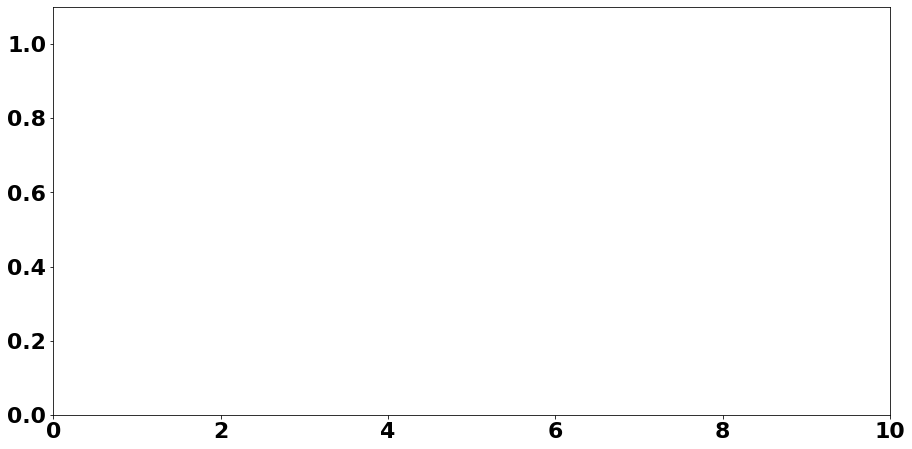

In [4]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(15, 7.5))

ax.set_xlim((0, 10))
ax.set_ylim((0, 1.1))

x = np.linspace(0, 10, 1000)
line, = ax.plot([], [], lw=4, color='k')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    if i == 0:
        t = 0.001
    else:
        t = i
    y = C(x, t)
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=30, blit=True)

(0.0, 10.0)

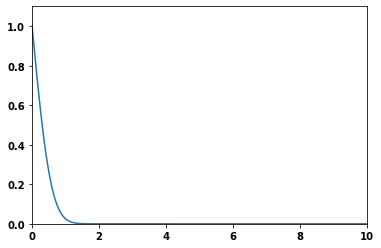

In [4]:
y  = np.linspace(0, 10, 1000)
C0 = 1
D  = 0.1

C = lambda y, t: C0 * (1. - special.erf(y / (2. * np.sqrt(D * t))))

plt.plot(y, C(y, 1))
plt.ylim([0, 1.1])
plt.xlim([0, np.max(y)])

In [5]:
HTML(anim.to_jshtml())

# Steady state of Diffusive Release into a flow

In [6]:
def cubicExpInt(x):
    """ 
    Compute this as \int[exp(-s^3 / 9, 0, infinity] - \int[exp(-s^3 / 9, 0, x)]
    """
    ExpRealLine = special.gamma(1./ 3) / np.power(3., 1./3)
    
    # Compute 
    Int = integrate.quad(lambda s: np.exp(-np.power(s, 3) / 9.), 0, x)
    return ExpRealLine - Int[0]

In [18]:
N = 100
Ly = 1
Lz = 1

h = Lz/N  # Step size in the z direction
k = Ly/N  # Step size in the y direction

# Create domain to plot on
yy = np.linspace(0, Ly, N+1)
zz = np.linspace(0, Lz, N+1)

# Function values
u = np.zeros((N, N))

C0 = 1.0   # Concentration on the plate
D  = 1.0   # Diffusion coefficient
u0 = 2.0   # Flow velocity
y0 = 0.1   # Velocity gradient 

# Non-dim parameter in the integratino limit.
nondim = (u0 / (D * y0))**(1./3)

for i, j in itertools.product(range(1, N+1), range(1, N+1)):
    lower_bd = k * j * nondim / np.power(h * i, 1./3)
    u[i-1, j-1] = 0.54 * C0 * cubicExpInt(lower_bd)

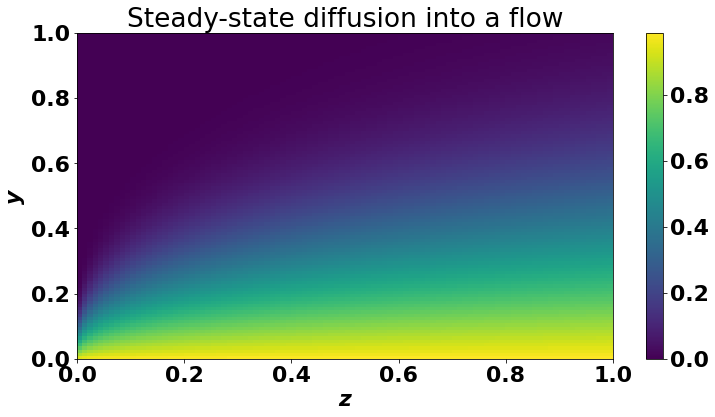

In [19]:
plt.figure(figsize=(12, 6))
z, y = np.meshgrid(zz, yy)
plt.pcolor(z, y, u.T)
plt.title('Steady-state diffusion into a flow')
plt.xlabel('$z$')
plt.ylabel('$y$')
plt.colorbar()

## Q1 b)

In [20]:
h = 1
w = 2
group = 1
v_inf = 1/8*group*h**2*(1-4*0**2/h**2)
v_inf

0.125

In [21]:
def l(n):
    l = (2*n+1)*np.pi/h
    return l

In [22]:
def analytic(y,z):
    v = 1/8*group*h**2*(1-4*y**2/h**2)
    coe = 4*group*h**2
    for n in range(200):
        v = v - coe*((-1)**n)*np.cos(l(n)*y)*(np.cosh(l(n)*z))*(1/((2*n+1)**3*(np.pi)**3))*(1/np.cosh(l(n)*(w/2)))
    return v

0.1138718321272743
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.09222794 0.09411193
 0.09587334 0.09751893 0.09905509 0.10048777 0.10182257 0.10306471
 0.10421908 0.10529022 0.10628235 0.10719942 0.10804504 0.10882258
 0.10953514 0.11018554 0.11077639 0.11131003 0.11178861 0.11221404
 0.11258801 0.11291202 0.11318737 0.11341516 0.11359631 0.11373154
 0.11382139 0.11386623 0.11386623 0.11382139 0.11373154 0.11359631
 0.11341516 0.11318737 0.11291202 0.11258801 0.11221404 0.11178861
 0.11131003 0.11077639 0.11018554 0.10953514 0.10882258 0.10804504
 0.10719942 0.10628235 0.10529022 0.10421908 0.10306471 0.10182257
 0.10048777 0.09905509 0.09751893 0.09587334 0.09411193 0.09222794
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        na

/tmp/ipykernel_24667/1919888190.py:5: RuntimeWarning: overflow encountered in cosh
  v = v - coe*((-1)**n)*np.cos(l(n)*y)*(np.cosh(l(n)*z))*(1/((2*n+1)**3*(np.pi)**3))*(1/np.cosh(l(n)*(w/2)))
/tmp/ipykernel_24667/1919888190.py:5: RuntimeWarning: invalid value encountered in multiply
  v = v - coe*((-1)**n)*np.cos(l(n)*y)*(np.cosh(l(n)*z))*(1/((2*n+1)**3*(np.pi)**3))*(1/np.cosh(l(n)*(w/2)))
/tmp/ipykernel_24667/1919888190.py:5: RuntimeWarning: overflow encountered in multiply
  v = v - coe*((-1)**n)*np.cos(l(n)*y)*(np.cosh(l(n)*z))*(1/((2*n+1)**3*(np.pi)**3))*(1/np.cosh(l(n)*(w/2)))
/tmp/ipykernel_24667/1919888190.py:5: RuntimeWarning: overflow encountered in cosh
  v = v - coe*((-1)**n)*np.cos(l(n)*y)*(np.cosh(l(n)*z))*(1/((2*n+1)**3*(np.pi)**3))*(1/np.cosh(l(n)*(w/2)))
/tmp/ipykernel_24667/1919888190.py:5: RuntimeWarning: invalid value encountered in multiply
  v = v - coe*((-1)**n)*np.cos(l(n)*y)*(np.cosh(l(n)*z))*(1/((2*n+1)**3*(np.pi)**3))*(1/np.cosh(l(n)*(w/2)))
/tmp/ipykernel_246

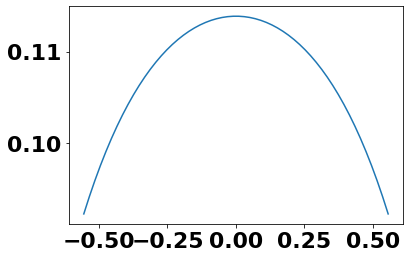

In [26]:
z = np.linspace(-w/2,w/2,100)
mid = analytic(0,0)
print(mid) # need to be above 0.1125 to stay with 10% deviation

plt.plot(z, analytic(0,z))
print(analytic(0,z))

## Q1 c)